<center>
<img src="https://raw.githubusercontent.com/hse-econ-data-science/eds_spring_2020/master/sem08_estimate_convergence/image/central-limit-theorem.png" width="600"> 
</center>

[How to explain Normal Distribution to a bro at the gym](https://www.reddit.com/r/funny/comments/m4aaee/how_to_explain_normal_distribution_to_a_bro_at/)

# Андан на экономе

## Семинар 4: ЗБЧ, ЦПТ и метод моментов в ~~мемах~~ картинках

В этом семинаре мы поговорим про сходимости, закон больших чисел и центральную предельную теорему.

In [1]:
import numpy as np
import scipy.stats as sts

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set_theme(style="whitegrid", palette="muted")

## 1. ЗБЧ

На теории вероятностей мы говорили про ЗБЧ (закон больших чисел). Мы говорили, что он очень клёвый, так как разрешает делать кучу вещей. Давайте вспомним его формулировку: 

#### Слабая форма ЗБЧ (Пафнутий Львович Чебышёв)

Пусть $X_1, \ldots, X_n$ попарно независимые и одинаково распределённые случайные величины с конечным вторым моментом, $E(X_i^2) < \infty$, тогда имеет место сходимость:

$$
\frac{X_1 + \ldots + X_n}{n} \overset{p}{\to} E(X_1)
$$

__Простым языком:__ 

* среднее арифметическое большого числа похожих случайных величин «стабилизируется» с рочтом их числа
* как бы сильно случайные величины не отклонялись от своего среднего значения, эти отклонения взаимно гасятся
* если у тебя есть страховая фирма, можно заработать бабла (самая простая формулировка) 

> Например, в XVI веке он впервые разрешил страховым команиям зарабатывать деньги. Люди вперввые начали составлять актуарные таблицы. Это такие таблицы, где указана ожидаемая продолжительность жизни для данного возраста и пола. Люди начали собирать данные о смертности и оценивать вероятность дожития человека до определённого возраста. На этом строились тарифы на страхование. Появление подобных таблиц обязано зарождению в течение 1600-х годов теории вероятности, которая впервые объяснила людям как случайные вещи при достаточно больших масштабах сглаживаются и становятся очень даже предсказуемыми. Надо признать, что у страхования было довольно трудное детство — как раз потому, что люди плоховато понимали концепцию вероятности. В голове довольно трудно удержать её. Многие люди и по сей день ошибочно думают, что могут влиять на случайность каким-то образом. Например, некоторые думают, что чаще других выбрасывают на кубике шестёрки. А ещё многие когнитивные искажения в нашей повседневной жизни вызваны плохим пониманием вероятности. Например, многие не понимают формулу Байеса и не могут адекватно оценить вероятность того, что [они заболели.](https://alexanderdyakonov.wordpress.com/2015/10/12/формула-байеса/) Даниэль Канеман в "Thinking fast and slow" пишет про разные другие когнитивные искажения, но мы чего-то отвлеклись. 

### Упражнение 1 (рисуем ЗБЧ)

__Давайте нарисуем ЗБЧ.__ Мы знаем, что математическое ожидание игральной кости это $3.5$. Сделаем симуляцию: 

* подкинем кость 1 раз, посчитаем среднее число на ней
* подкинем кость 2 раза, посчитаем среднее число на ней

.....

* подкинем кость 100 раз, посчитаем среднее число на ней

Построим картинку для всех этих средних и убедимся в том, что оно и правда сходится к $3.5$. Будем всё делать в `numpy`. Никаких циклов!

In [ ]:
# Ваш код

## 2. Сходимость по вероятности

Увидели, что оно сходится? Вопрос только в том как именно. Над стрелкой в ЗБЧ есть буква $p$. 

$$
\frac{X_1 + \ldots + X_n}{n} \overset{p}{\to} E(X_1)
$$

Она означает, что последовательность случайных величин слева сходится к случайной величине справа по вероятности, то есть чем больше $n$ тем ближе вероятность отклонения $\bar x_n$ от $E(X)$ к нулю: 

$$ 
P(\mid \bar x_n - 3.5 \mid \ge \varepsilon) \to 0
$$

Давайте возьмём $\varepsilon = 0.01$, нарисуем на нашей картинке из предыдущего упражнения коридор $3.5 \pm \varepsilon$, продолжим ряд до $100000$ подбрасываний и увидим, как постепенно $\bar x_n$ попадает в коридор и всё реже выбивается из него. 

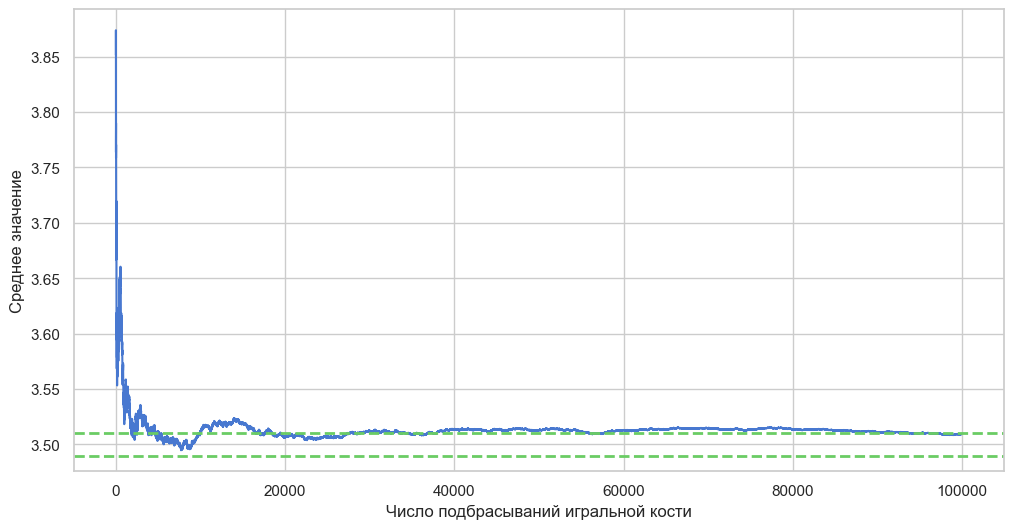

In [8]:
n_obs = 100000

# подкидываем кубик с повторениями много раз
x = np.random.choice(np.arange(1,7), size=n_obs) 
x_cumsum = np.cumsum(x)

x_mean = x_cumsum/np.arange(1, n_obs + 1)

eps = 0.01

plt.figure(figsize=(12,6))
plt.plot(x_mean[100:])
plt.axhline(3.5 + eps, color='g', linestyle='dashed', linewidth=2)
plt.axhline(3.5 - eps, color='g', linestyle='dashed', linewidth=2)

plt.xlabel('Число подбрасываний игральной кости')
plt.ylabel('Среднее значение');

Можно попробовать оценить вероятность того, что последовательность из средних пробьёт на конкретном шаге установленный нами коридор. Для этого давайте сгенерируем много-много траекторий для игральной кости, как на картинке выше. А после посмотрим как часто на конкретном шаге эти траектории пробивают коридор $3.5 \pm \varepsilon$. Частота таких пробоин будет оценкой вероятности 

$$ 
P(\mid \bar x_n - 3.5 \mid \ge \varepsilon).
$$

In [9]:
n_obs = 10**4

# каждый раз подбрасываем кубик 1000 раз
x = np.random.choice(np.arange(1,7), size=(n_obs, 1000))

# по строкам считаем кумялятивную сумму 
x_cumsum = np.cumsum(x, axis = 0)

# находим средние
x_cumsum = x_cumsum/np.arange(1, n_obs + 1)[:,None]
x_cumsum.shape

(10000, 1000)

In [10]:
x_cumsum

array([[5.        , 2.        , 6.        , ..., 2.        , 6.        ,
        1.        ],
       [3.5       , 2.5       , 4.        , ..., 3.5       , 5.        ,
        1.        ],
       [3.33333333, 3.33333333, 4.        , ..., 3.        , 4.66666667,
        1.33333333],
       ...,
       [3.52990598, 3.49419884, 3.5045009 , ..., 3.4714943 , 3.49359872,
        3.52930586],
       [3.53015302, 3.49434943, 3.50465047, ..., 3.47174717, 3.49354935,
        3.52905291],
       [3.5299    , 3.4943    , 3.5046    , ..., 3.4716    , 3.4936    ,
        3.529     ]])

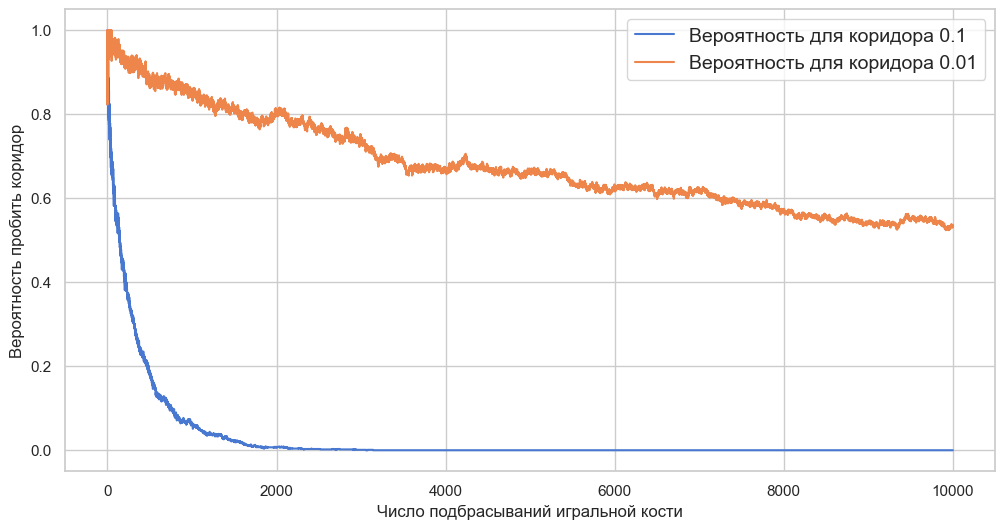

In [11]:
eps1 = 0.1
eps2 = 0.01

# все события, когда пробили коридор 
bad_events_1 = np.abs(x_cumsum - 3.5) > eps1
bad_events_2 = np.abs(x_cumsum - 3.5) > eps2

# вероятность пробоины 
proba_1 = np.mean(bad_events_1, axis=1)
proba_2 = np.mean(bad_events_2, axis=1)

plt.figure(figsize=(12,6))
plt.plot(proba_1, label = f"Вероятность для коридора {eps1}")
plt.plot(proba_2, label = f"Вероятность для коридора {eps2}")
plt.xlabel('Число подбрасываний игральной кости')
plt.ylabel('Вероятность пробить коридор')
plt.legend(fontsize=14);

Как мы видим, вероятность пробить коридор поначалу является высокой, но постепенно убывает. При этом, для более узкого коридора, вероятность убывает медленнее, что логично :) 

Для нашей ситуации со сходимостью к константе можно построить аналогичные графики для дисперсии среднего

$$
Var(\bar x_n) = \frac{Var(X_1 + \ldots  + X_n)}{n^2} = \frac{Var(X_1)}{n}.
$$

В знаменателе у нас $n$. По мере роста выборки разброс убывает и среднее сходится к математическому ожиданию. __Важно держать в голове, что дисперсия убывает только при сходимости к константе!__

Давайте посмотрим на то, как все три картинки выглядят рядом. На них нарисовано, как среднее $\bar x$, посчитанное по выборке $x_1, \ldots, x_n \sim iid N(2,1),$ сходится по вероятности к $2$. 

<center>
<img src="https://raw.githubusercontent.com/hse-econ-data-science/eds_spring_2020/master/sem08_estimate_convergence/image/animation_prob_conv.gif" width="1500"> 
</center>

## 3. Расходимость  по вероятности


Теперь мы знаем, как выглядит сходимость по вероятности. Интересно было бы посмотреть, как выглядит её отсутствие.

Распределение Коши — тот ещё фрукт. У стандартного распределения Коши такая плотность: 

$$
f_X(x) = \frac{1}{\pi(1+x^2)}
$$

Выглядит красиво. Эта красота обманчива. У распределения Коши нет математического ожидания и дисперсии. ЗБЧ говорит нам, что для некоторых распределений 

$$ 
P( \mid \bar x - E(X)\mid \ge \varepsilon  ) \to 0, 
$$

то есть выборочное среднее по вероятности сходится к математическому ожиданию. Интересно было бы узнать к чему будет сходиться выборочное среднее для распределения Коши... __Математического ожидания то не существует!__ 

Построим для выборочного среднего распределения Коши картинку, которую мы строили при иллюстрации ЗБЧ чуть выше. 

In [12]:
cauchy_rv = sts.cauchy()  # генератор 

n_obs = 10**4

# 1000 траекторий по n_obs шагов
x = cauchy_rv.rvs(size = (n_obs,1000))
x.shape

(10000, 1000)

In [13]:
# по строкам считаем кумялятивную сумму 
x_cumsum = np.cumsum(x, axis = 0)

# находим средние
x_mean = x_cumsum/np.arange(1, n_obs + 1)[:,None]
x_mean.shape

(10000, 1000)

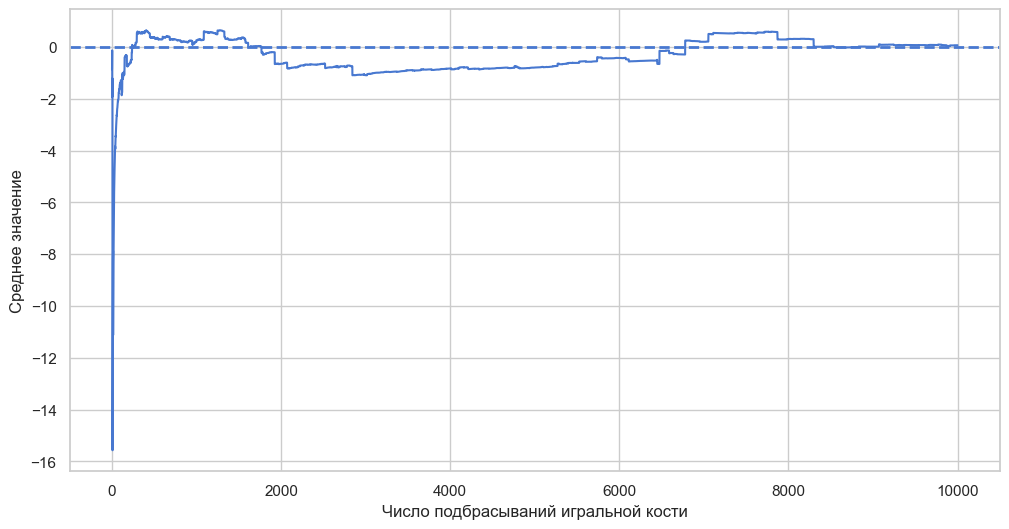

In [14]:
# Нарисуем одну любую траекторию

plt.figure(figsize=(12,6))
plt.plot(x_mean[:,442])
plt.axhline(0, color='b', linestyle='dashed', linewidth=2)
plt.xlabel('Число подбрасываний игральной кости')
plt.ylabel('Среднее значение');

Тут может банально повести и траектория будет визуально выглядеть хорошо. Но что происходит с вероятностями? 

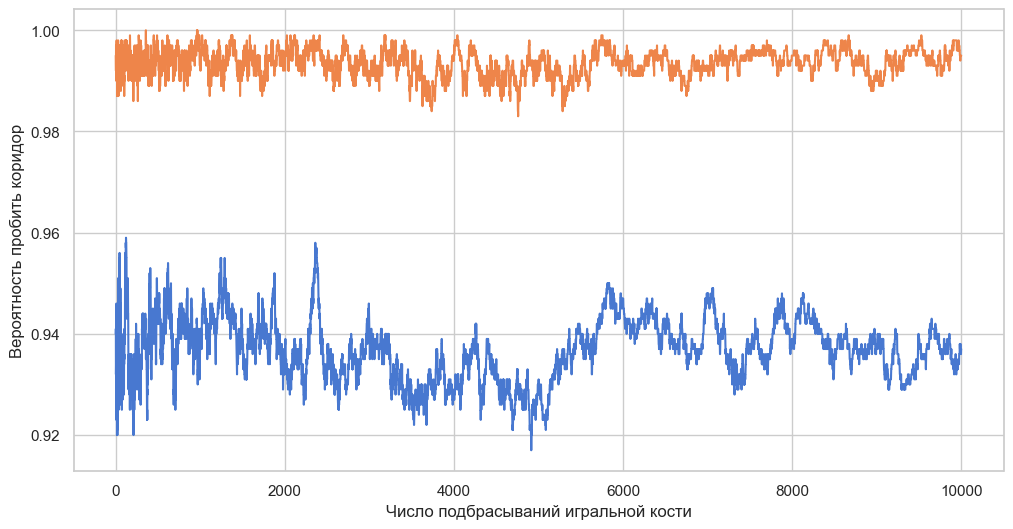

In [15]:
eps1 = 0.1
eps2 = 0.01

# все события, когда пробили коридор 
bad_events_1 = np.abs(x_mean - 0) > eps1
bad_events_2 = np.abs(x_mean - 0) > eps2

# вероятность пробоины 
proba_1 = np.mean(bad_events_1, axis=1)
proba_2 = np.mean(bad_events_2, axis=1)

plt.figure(figsize=(12,6))
plt.plot(proba_1)
plt.plot(proba_2)
plt.xlabel('Число подбрасываний игральной кости')
plt.ylabel('Вероятность пробить коридор');

Никакого движения к нулю. Постоянные пробоины в нашем коридоре. При этом, во времени их количество никак не уменьшается. Так выглядит отсутствие сходимости по вероятности. Обратите внимание, что величина пробоины не очень важна. В случае, когда сходимость есть, пробоины также могут быть очень большими, но они происходят всё реже.

Давайте посмотрим на то, как все три картинки выглядят рядом. На них изобразим первые $200$ шагов для распределения Коши. Чисто визуально сравните с первыми $200$ шагами для нормального распределения из предыдущего упражнения и ужаснитесь. 

<center>
<img src="https://raw.githubusercontent.com/hse-econ-data-science/eds_spring_2020/master/sem08_estimate_convergence/image/animation_prob_unconv.gif" width="1400"> 
</center>

## 4. Центральная предельная теорема

#### ЦПТ

Пусть $X_1, \ldots, X_n$ случайные величины, имеющие одинаковое распределение с конечными математическим ожиданием и дисперсией. Обычно этот факт записывают вот так:

$$
X_1, \ldots, X_n \sim iid(\mu,\sigma^2)
$$

тогда при $n \to \infty$ имеет место сходимость по распределению: 

$$
\sqrt{n} \cdot \frac{\bar{x}_n - \mu}{\sigma} \overset{d}{\to} N(0,1)
$$


__Простым языком:__ 

* При определённых условиях сумма достаточно большого числа случайных величин имеет распределение близкое к нормальному 
* __Главное,__ чтобы случайные величины были похожи и не было такого, что одна резко выделяется на фоне остальных 


### Упражнение 2 (ЦПТ для равномерного)

Пусть $X \sim U[-1;1]$, пусть $Y = X_1 + \ldots + X_n$ 

* Нарисуем гистограмму для $X_1$, $X_1 + X_2$,  $X_1 + X_2 + X_3$ и $X_1 + X_2 + X_3 + X_4$.
* На последней картинке нарисуем плотность распределения $N(0,1)$ и визуально сравним, насколько сильно оно отличается от гистограммы. 

In [ ]:
# ващ код

Уже для четырёх слагаемых распределение довольно сильно напоминает $N(0,1)$. Вот так равномерное распределение будет вести себя дальше: 

<center>
<img src="https://raw.githubusercontent.com/hse-econ-data-science/eds_spring_2020/master/sem08_estimate_convergence/image/animation_CPT_1.gif" width="350"> 
</center>

Разные распределения сходятся к нормальному с разными скоростями. Например, хи-квадрат с одной степенью свободы будет сходиться дольше. 

<center>
<img src="https://raw.githubusercontent.com/hse-econ-data-science/eds_spring_2020/master/sem08_estimate_convergence/image/animation_CPT_2.gif" width="350"> 
</center>

## 5. Сходимость по распределению

В ЦПТ над мы написали над стрелкой букву $d$. Она означает, что последовательность случайных величин сходится по распределению. 

__Определение:__ говорят, что последовательность случайных величин $X_1, X_2, \ldots$ сходится к случайной величине $X$ _по распределению,_ если $F_{X_n}(x) \to F_X(x)$ для всех $x$, в которых $F_X(x)$ непрерывна. Если функции сходятся, она есть. Если не сходятся, её нет.  

__Пример:__ распредеелние Стьюдента при большом $n$ (число степеней свободы) становится похоже на нормальное, то есть $t(n) \overset{d}{\to}  N(0,1)$.

Давайте это продемонстрируем: 

* Построим на картинке линию: плотность для $N(0,1)$.
* Построим пять пунктирных разноцветных линий: $t(1)$, $t(2)$, $t(5)$, $t(10)$, $t(50)$.
* Сделаем то же самое для функций распределения

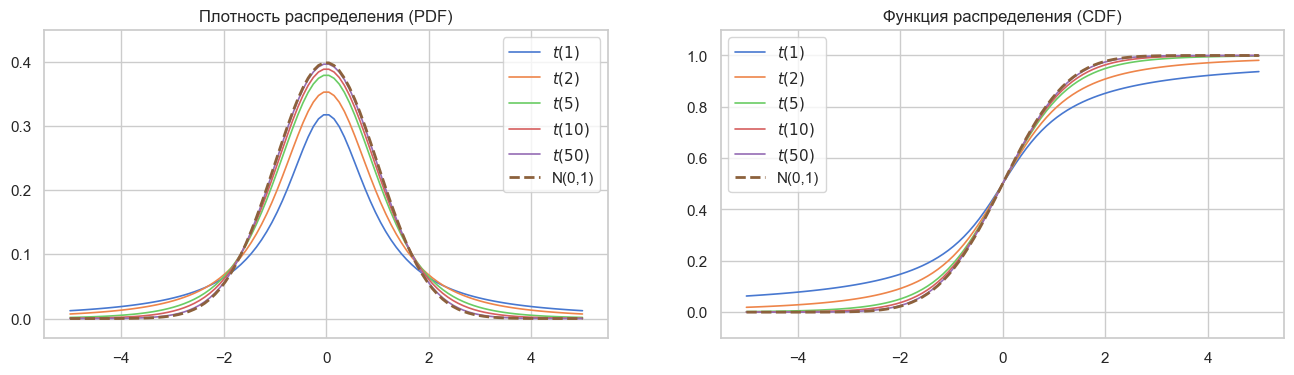

In [22]:
x = np.linspace(-5,5,100)

fig, ax = plt.subplots(1,2,figsize=(16, 4))

for k in [1, 2, 5, 10, 50]:    
    rv = sts.t(df=k)
    pdf = rv.pdf(x)
    cdf = rv.cdf(x) 
    ax[0].plot(x, pdf, label="$t(%s)$" % k, lw=1.2)
    ax[1].plot(x, cdf, label="$t(%s)$" % k, lw=1.2)


rv_limit = sts.norm( )
pdf_limit = rv_limit.pdf(x)
cdf_limit = rv_limit.cdf(x)

ax[0].plot(x, pdf_limit, label='N(0,1)', linestyle='dashed', lw=2)
ax[0].set_ylim(-0.03,0.45)
ax[0].set_title("Плотность распределения (PDF)")
ax[0].legend() 

ax[1].set_ylim(-0.1,1.1)
ax[1].plot(x, cdf_limit, label='N(0,1)', linestyle='dashed', lw=2)
ax[1].set_title("Функция распределения (CDF)")
ax[1].legend();

Конечно же, держите гифку. Как же без неё: 

<center>
<img src="https://raw.githubusercontent.com/hse-econ-data-science/eds_spring_2020/master/sem08_estimate_convergence/image/animation_convdist_student.gif" width="1500"> 
</center>

## 6. Мощь средних

Зачем всё это нужно? Для того, чтобы работать с выборками, оценивать параметры и строить доверительные интервалы!

### Примерная схема матстата 

__Задача:__ мы предполагаем, что какая-то штука описывается каким-то распределением с параметром $\theta$. Чтобы понимать эту штуку, нам нужно параметр $\theta$ оценить. __Важно:__ мы препдполагаем, что $\theta$ - константа. 

<img src="https://raw.githubusercontent.com/hse-econ-data-science/eds_spring_2020/master/sem08_estimate_convergence/image/matstat_sh.png" width="750"> 

__Оценивание:__ получить оценку $\hat \theta$ можно разными методами. Например, методом моментов или методом максимального правдоподобия. 

__Точечная оценка:__ Та оценка, которую мы поулчим, будет функцией от выборки, то есть слуайной величиной. Если у нас есть одна выборка, то будет одна оценка. Если другая выборка, то будет другая оценка. Нам бы хотелось понимать, насколько другой может оказаться оценка при новой выборке. Для этого нам нужно знать, как эта оценка распределена. 

Зная распределение оценки, мы сможем посмотреть в каком диапазоне находится $95\%$ её вероятностной массы и сказать, что за края этого диапазона истиное значение будет вылетать редко. Этот диапозон называется доверительным интервалом. Если он получается коротким, то оценка довольно точная. Если длинным, то не очень.

__Распределение оценки:__ Чтобы построить для оценки параметра доверительный интервал, нужно знать, как эта оценка распределена. Тут нам на помощь приходят разные союзники. Например, для среднего это ЦПТ. Она говорит, что среднее асимптотически нормально распределено, и мы можем использовать нормальное распределение для доверительных интервалов и проверки гипотез. Есть и другие союзники, которые помогают нам в разных ситуациях понимать, насколько точными оказались прогнозы и отвечать на вопросы. 

Вы их будете подробно разбирать на лекциях по матстату.

### Метод моментов

ЗБЧ говорит нам, что $$\bar x_n \overset{p}{\to}  \mathbb{E}(X_1).$$ 

То есть при больших $n$  $$\bar x_n \approx \mathbb{E}(X_1).$$

Из этого уравнения мы можем получить оценку для неизвестного параметра.

__Пример:__

Для выборки 

$$X_1, \ldots, X_n \sim iid \quad U[0; a].$$ 

Мы можем оценить неизвестный параметр $a$ с помощью метода моментов 

$$\bar x_n = \frac{a}{2} \Rightarrow \hat{a} = 2 \bar x_n.$$

In [23]:
a = 100 # природа задумала параметр

uniform_gen = sts.uniform(0, a)
x = uniform_gen.rvs(100) # природа дала нам выборку

In [24]:
# мы оценили методом моментов параметр a
a_hat = 2 * x.mean()
a_hat

104.49098728365361

Точечная оценка может сильно измениться, если изменится выборка.

In [25]:
x = uniform_gen.rvs(100)
2 * x.mean()

97.71200156971483

In [26]:
x = uniform_gen.rvs(100)
2 * x.mean()

101.41970961267367

Чтобы понимать, в каком диапазоне лежит неизвестный параметр $a$ придумали __доверительные интервалы.__ С помощью функции ниже можно изобразить диапазон, в который нормальная случайная величина попадает с вероятностью $0.95$.

(-1.959963984540054, 1.959963984540054)

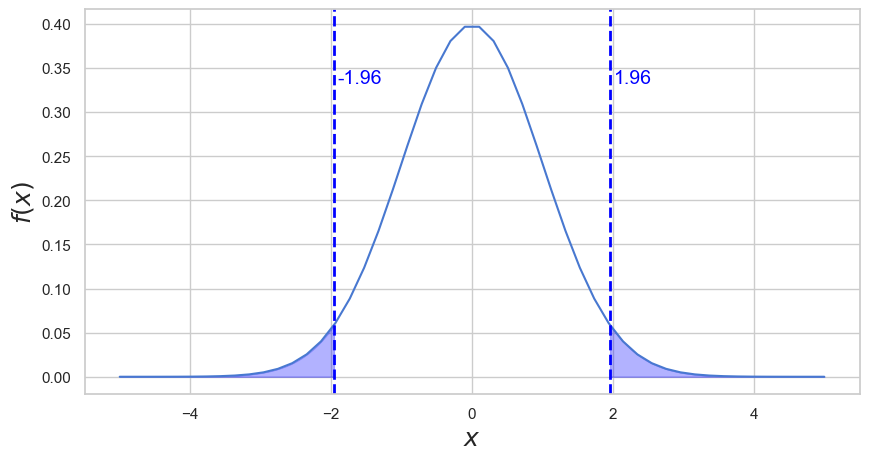

In [27]:
def norm_conf_int(alpha, mean_hat=0, std_hat=1, margin=5):
    """
        Строит 95% асимптотически-нормальный доверительный интервал
    """
    
    plt.figure(figsize=(10,5))
    xs = np.linspace(mean_hat - margin, mean_hat + margin)
    pdf = sts.norm(mean_hat, std_hat).pdf(xs)

    plt.plot(xs, pdf)
    plt.ylabel('$f(x)$', fontsize=18)
    plt.xlabel('$x$', fontsize=18)

    left, right = sts.norm.interval(1 - alpha, loc=mean_hat, scale=std_hat)
    
    for i in [left, right]: 
        y_max = plt.ylim()[1]
        plt.axvline(i, color="blue", linestyle='dashed', lw=2)
        
        if i == left:
            xq = np.linspace(mean_hat - margin, left)
        else:
            xq = np.linspace(right, mean_hat + margin)
        
        text_margin = 0.05
        plt.text(i + text_margin, 0.8*y_max, round(i, 2), color="blue", fontsize=14)
        yq = sts.norm(mean_hat, std_hat).pdf(xq)
        plt.fill_between(xq, 0, yq, color='blue', alpha=0.3)

    return left, right
    
alpha = 0.05
norm_conf_int(0.05)

ЦПТ говорит нам, что среднее имеет асимптотически нормальное распределение

$$ 
\bar x \overset{asy}{\sim} N \left(\mu, \frac{\hat{\sigma}^2}{n}\right).
$$ 

На основе этого мы можем построить для среднего доверительный интервал. Окажется, что это 

$$
\bar x_n \pm z_{1 - \frac{\alpha}{2}} \cdot \frac{\hat \sigma}{\sqrt{n}}
$$

Откуда взялась такая формула вы подробно поговорить на лекциях по матстату. Пока что можно прочитать [небольшую историю про Шарика, Матроскина и их деревню.](https://github.com/FUlyankin/matstat-AB/blob/main/week06_matstat_sh/hypotesovo.pdf)

__Пример:__

В случае равномерного распределения из задачки выше 

$$
\hat{a} = 2 \bar x_n \overset{asy}{\sim} N \left(a, \frac{a^2}{3 n}\right) 
$$

так как

$$
\mathbb{E}(\hat a) = 2 \mathbb{E}(\bar x_n) = 2 \cdot \mathbb{E} \left( \frac{x_1 + \ldots + x_n}{n} \right) = 2 \cdot \frac{n \cdot \mathbb{E}(x_1)}{n} = 2 \cdot \mathbb{E}(x_1) = 2 \cdot \frac{a}{2} = a
$$

$$
\text{Var}(\hat a) = 4 \cdot \text{Var}(\bar x_n) = 4 \cdot \text{Var} \left( \frac{x_1 + \ldots + x_n}{n} \right) = 4 \cdot \frac{n \cdot \text{Var}(x_1)}{n^2} = \frac{4}{n} \cdot \text{Var}(x_1) = \frac{4}{n}  \cdot \frac{a^2}{12} = \frac{a^2}{3n}
$$

Над неизвестным параметром $a$ в оценке дисперсии можно поставить колпачок. [Это не испортит сходимость](https://www.youtube.com/watch?v=j3KbhEryEGU&list=PLCf-cQCe1FRxoI9khulGS0cDaUNaSTa7A&index=2) к нормальному распределению.

$$
\hat{a} = 2 \bar x_n \overset{asy}{\sim} N \left(a, \frac{\hat{a}^2}{3 n}\right) 
$$

Получаем доверительный интервал для $a$

$$
\bar 2 \cdot x_n \pm z_{1 - \frac{\alpha}{2}} \cdot \frac{\hat a}{\sqrt{3n}}
$$

In [28]:
a = 10
n = 100

x = uniform_gen.rvs(100)
2 * x.mean()

a_hat = 2 * x.mean()
std_hat = a_hat/np.sqrt(3*n)

(87.52031791754482, 109.85503080479583)

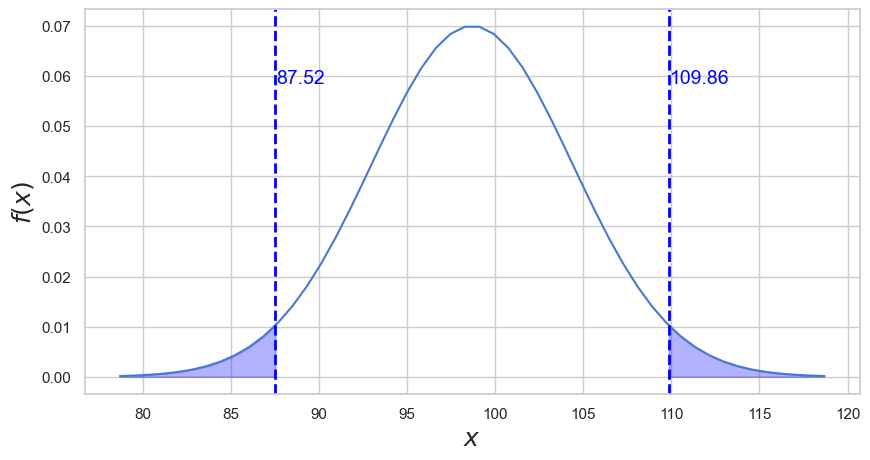

In [29]:
alpha = 0.05
norm_conf_int(alpha = 0.05, mean_hat=a_hat, std_hat=std_hat, margin=20)

### Упражнение 3 (шахтёры) 

На угольных шахтах ежегодно происходят аварии. Англия довольно давно собирает информацию о числе крупных аварий. Именно её нам предстоит проанализировать:

* хочется понять как часто в среднем происходят аварии 
* насколько большой у среднего числа аварий доверительный интервал

In [30]:
import pandas as pd

url = "https://raw.githubusercontent.com/FUlyankin/matstat-AB/main/week06_matstat_sh/data/coals.csv"
df = pd.read_csv(url, index_col=0)
df.head()

,year,count
1,1851,4
2,1852,5
3,1853,4
4,1854,1
5,1855,0


В колонке `year` находится год наблюдений. В колонке `count` число аварий за этот год на шахтах в Англии. Посмотрим на распределение числа аварий. 

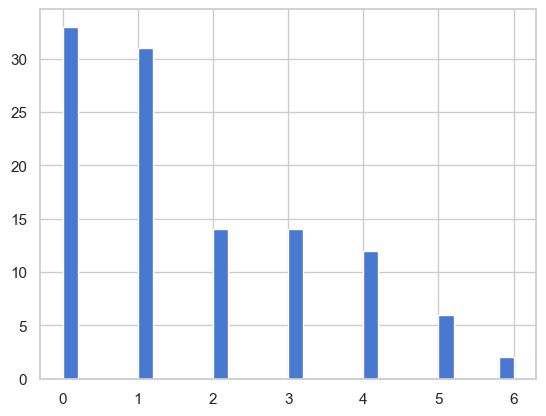

In [31]:
df['count'].hist(bins=30);

Судя по гистограмме уместно предположить, что число аварий имеет распределение Пуассона, $Poiss(\lambda)$.  То есть, если мы хотим что-то понять про среднее число аварий, нам надо оценить параметр $\lambda$. 

__а)__ Найдите оценку параметра $\lambda$ с помощью метода моментов. Запишите получившийся результат в переменную `lambda_hat`.

In [32]:
# ваш код

__б)__ Среднее, оценённое методом моментов будет иметь асимптотически нормальное распределение. Оцените стандартное отклонение этого распределения по выборке и запишите ответ в переменную `lam_se`. 

> __Примечание:__ мы предполагаем, что выборка пришла из распределения Пуассона. Для него $Var(X) = \lambda$. Для оценки стандартного отклонения используйте этот факт. Конечно же вы можете оценить его через функцию `std`, в плане асимптотики результат получится одинаковый.

In [33]:
# ваш код 

__в)__ Постройте для неизвестного математического ожидания $\lambda$ доверительный интервал. Возьмите уровень значимости равный $10\%$. В переменные `left` и `right` запишите соотвествующие границы интервала. В переменную `delta` запишите его ширину.

In [34]:
# ваш код

Доверительный интервал [1.502, 1.908] ширины 0.4059


__г)__  Многие говорят, что в $20$ веке катастроф стало на порядок меньше. Давайте проверим это. Постройте оценку для $\lambda_1$ по данным до $1900$ года включительно. Постройте оценку для $\lambda_2$ по данным после $1900$ года. Для разности $\lambda_1 - \lambda_2$ постройте $95\%$ доверительный интервал. 

In [35]:
# ваш код

Доверительный интервал [1.284, 2.31] ширины 1.026


Ноль не вошёл в этот доверительный интервал. Это означает, что на уровне значимости $5\%$ мы можем сказать, что число аварий правда снизилось. 

### Упражнение 4 (доверительный интервал) 

Доверительный интервал покрывает истиное значение параметра с вероятностью $1 - \alpha$. Пусть 

$$X_1, \ldots, X_n \sim iid \quad U[0; a],$$ 

истиное значение $a=10$, $n=100$ и $\hat{a} = 2 \bar x_n.$ Постройте для $a$ с помощью ЦПТ $95\%$ асимптотический доверительный интервал и убедитесь, что он покрывает истиное значение $a$ с вероятностью $0.95$.

In [36]:
# ваш код 

## 7. Про другие сходимости (картинка и ссылки почитать) 


На самом деле есть и другие виды сходимостей случайных величин. И между ними даже есть связи: 


<img src="https://raw.githubusercontent.com/hse-econ-data-science/eds_spring_2020/master/sem08_estimate_convergence/image/conv.png" width="600"> 


Пойдём с правой части кратинки в левую. 

* Самая слабая сходимость, __сходимость по распределению!__ Чтобы сказать, что последовательность случайных величин $X_n$ сходится по распределению к случайной величине $X$, обычно над стрелочкой пишут букву $L$ или букву $d$ или просто рисуют двойную стрелочку, $\Rightarrow$. Из-за того, что эта сходимость самая слабая её так иногда и называют, __слабой.__
* Сходимость чуть посильнее, это __сходимость по вероятности.__ Обычно её обозначают, подписывая над стрелкой букву $p$. Если последовательность сходится по вероятности, тогда она будет сходиться и по распределению. 
* Сходимость по вероятности, в свою очередь следует из __сходимости почти наверное__ (almost surely). Чтобы обозначить эту сходимость, над стрелкой пишут $a.s.$
* Также сходимость по вероятности следует из __сходимости в среднем порядка $r$.__ Над стрелкой в случае такой сходимости либо подписывают порядок сходимости, либо пишут $L^r$. 

Последние два вида сходимостей самые сильные. Между ними нет чёткой взаимосвязи. С ними мы в этой тетрадке познакомиться не успели, но вы можете сделать это сами в почиташках! Они в README к семинару.  